# 第二章

## 笛卡尔坐标

### 依据勾股定理计算向量长度

In [3]:
from math import sqrt

def length(v):
    return sqrt(v[0] ** 2 + v[1] ** 2)

length((5, 12))

13.0

### 二维向量的sum函数实现

In [4]:
def ver_sum(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

ver_sum((-2, 0), (1, 1), (3, 4))

(2, 5)

### 实现函数translate，接收一个平移向量和一个向量列表，返回一个根据平移向量平移后的向量列表

In [5]:
def translate(translation, vectors):
    return [ver_sum(translation, v) for v in vectors]

translate((1, 1), [(0, 0), (0, 1), (-3, -3)])

[(1, 1), (1, 2), (-2, -2)]

##### TIPS: 可以用平移的方法快速绘制出很多的多边形和复杂图形

### 计算向量的标量相乘算法，用来对向量进行缩放

In [6]:
def scale(scalar, v):
    return (scalar * v[0], scalar * v[1])

scale(3, (2, 5))

(6, 15)

### 实现向量减法

In [7]:
def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

subtract((3, 5), (2, 4))

(1, 1)

### 向量之间的距离计算distance函数实现

In [8]:
def distance(v1, v2):
    return length(subtract(v1, v2))

distance((3, 5), (2, 4))

1.4142135623730951

### 计算多边形周长

In [9]:
def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)]) for i in range(len(vectors))]
    return sum(distances)

perimeter([(0, 0), (0, 1), (-3, -3)])

10.242640687119284

### 总结
* 向量加法是`平移`图形
* 标量乘法是`缩放`图形
* 向量减法计算两个向量间的`位移`，是从减数到被减数的位移
    * 根据向量减法结果，利用勾股定理可以算出这个向量的长度，即两个向量间的`距离`
    * 得到多边形的所有点的向量，可以利用向量减法算出所有点之间的距离，继而算出`周长`

## 极坐标和笛卡尔坐标的转换

In [10]:
from math import *

# angle是弧度值 360 = 2*pi
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length * cos(angle), length * sin(angle))

angle = 37*pi/180
to_cartesian((5, angle))

(3.993177550236464, 3.0090751157602416)

In [11]:
from math import *

def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return (length(vector), angle)

to_polar((1, 0))

(1.0, 0.0)

### 练习2.37

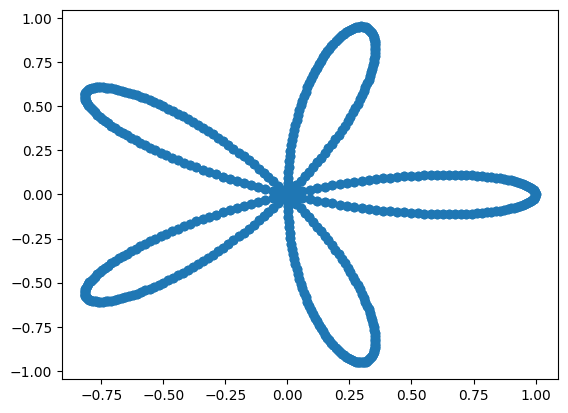

In [16]:
import matplotlib.pyplot as plt
from math import *

polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(1000)]
vectors = [to_cartesian(p) for p in polar_coords]

plt.scatter(*list(zip(*vectors)))

### 图像旋转

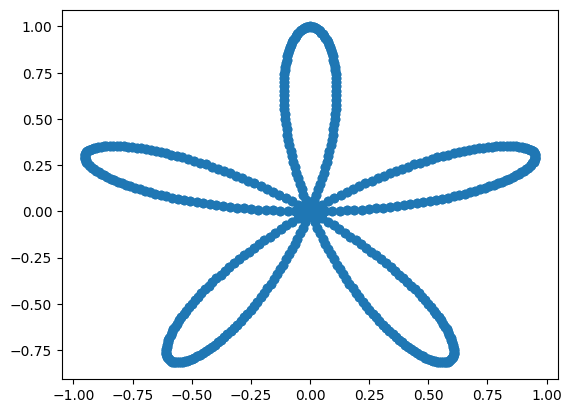

In [38]:
import matplotlib.pyplot as plt

def rotate(rotation_angle, vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, angle + rotation_angle)) for l, angle in polars]

from math import *

polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(1000)]
vectors = [to_cartesian(p) for p in polar_coords]
vectors = rotate(pi/2, vectors)

x = [v[0] for v in vectors]
y = [v[1] for v in vectors]

plt.scatter(x, y)

### 练习2.43
规则7边形，其顶点围绕原点均匀分布：基于原点对向量（1， 0）进行6次均匀的旋转，从而得到了各个顶点。

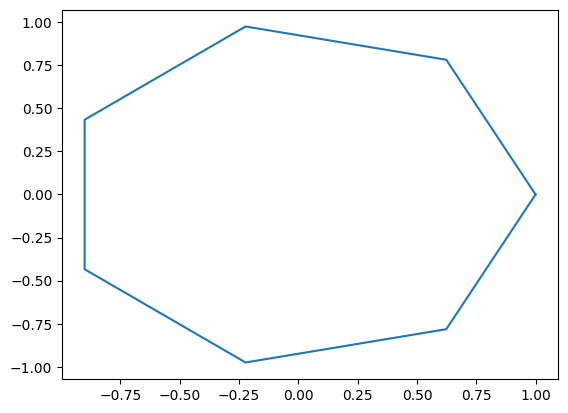

In [40]:
import matplotlib.pyplot as plt
from math import *

def regular_polygon(n):
    return [to_cartesian((1, 2*pi*k/n)) for k in range(n)]

vectors = regular_polygon(7)

x = [v[0] for v in vectors]
x.append(vectors[0][0])
y = [v[1] for v in vectors]
y.append(vectors[0][1])

plt.plot(x, y)

### 总结
* 利用极坐标可以计算两个向量的`夹角`
* 利用极坐标实现图形的`旋转`

###

## 本章总结
* 向量加法是`平移`图形
    * 移动方向同平移向量方向相同，长度就是平移向量的长度
* 标量乘法是`缩放`图形
    * 大于1为放大
    * 小于1大于0为缩小
* 向量减法计算两个向量间的`位移`，是从减数到被减数的位移
    * 根据向量减法结果，利用勾股定理可以算出这个向量的长度，即两个向量间的`距离`
    * 得到多边形的所有点的向量，可以利用向量减法算出所有点之间的距离，继而算出`周长`
* 利用极坐标可以计算两个向量的`夹角`
    * 弧度为向量同x轴逆时针方向夹角
* 利用极坐标实现图形的`旋转`